<a href="https://colab.research.google.com/github/camiPadilla/SIS420CP/blob/main/regresion_logistica_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [34]:
#cargamos datos
data = pd.read_csv('/content/drive/MyDrive/datasets/smoke_detection_iot.csv', header=0)

In [35]:
#mostramos el dataset
print(data)

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0               0  1654733331          20.000        57.36          0   
1               1  1654733332          20.015        56.67          0   
2               2  1654733333          20.029        55.96          0   
3               3  1654733334          20.044        55.28          0   
4               4  1654733335          20.059        54.69          0   
...           ...         ...             ...          ...        ...   
62625       62625  1655130047          18.438        15.79        625   
62626       62626  1655130048          18.653        15.87        612   
62627       62627  1655130049          18.867        15.84        627   
62628       62628  1655130050          19.083        16.04        638   
62629       62629  1655130051          19.299        16.52        643   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
0            400   12306        18520        9

In [36]:
# observamos si nos faltan datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [37]:
# Eliminar columnas irrelevantes para la regresion
columna_eliminar = ['Unnamed: 0']
data.drop(columna_eliminar, axis=1, inplace=True)

# Muestra el DataFrame resultante
print(data)

              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

       Raw Ethanol  Pressure[hPa]  PM1.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [40]:
#lectura de datos
X = data.iloc[:, :14]
y = data.iloc[:, 14]
m = y.size

In [41]:
print(X)
print('*'*15)
print(y)

              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

       Raw Ethanol  Pressure[hPa]  PM1.

In [42]:
#Dividimos los datos en Train (80%) y test (20%)
train_dataB, test_dataB = train_test_split(data, test_size=0.2, random_state=42)

In [43]:
print("Datos entrenamiento")
print(train_dataB)

Datos entrenamiento
              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
28479  1654764828          21.430        59.72        283        400   13138   
42605  1654778954          25.980        47.24       1247        422   12886   
17963  1654751294          18.116        47.55       1124        400   12909   
56394  1654717439          59.620        11.60      60000       4305   11771   
29875  1654766224          22.250        48.83         24        400   13255   
...           ...             ...          ...        ...        ...     ...   
62570  1655129992           7.664        15.67        781        400   13712   
38158  1654774507          27.080        47.10       1124        540   12839   
860    1654734191          26.945        57.50          0        400   13006   
15795  1654749126          11.997        47.93       1128        404   12884   
56422  1654717467          57.270        12.32      53355        586   12723   

       Raw Ethanol 

In [44]:
print("Datos de prueba")
print(test_dataB)

Datos de prueba
              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
31120  1654767469          21.330        51.93        138        400   13190   
49054  1654785403          24.300        53.78       1297        400   13015   
55910  1654716955          43.330        18.53          0        400   13621   
33802  1654770151          18.440        56.79        358        400   13069   
9683   1654743014          -4.350        57.35        825        977   12634   
...           ...             ...          ...        ...        ...     ...   
2084   1654735415          21.805        47.50          0        400   13164   
24481  1654757812          -1.740        54.32       1253        400   13002   
41631  1654777980          26.940        47.87       1222        408   12886   
54885  1654715930          25.850        44.96          0        400   13456   
9273   1654742604          -5.169        60.25        586        572   12855   

       Raw Ethanol  Pre

In [45]:
# creamos un archivo para el dataset de entrenamiento
train_dataB.to_csv("train2.csv", index=False)

In [46]:
# creamos un archivo para el dataset de prueba
test_dataB.to_csv("test2.csv", index=False)

In [47]:
#Cargamos el dataset de entrenamiento
data = pd.read_csv('train2.csv')

In [62]:
# Leemos el dataset y seleccionamos las columnas para X y y
X = data.iloc[:, :14]
y = data.iloc[:, 14]
m = y.size

In [63]:
# Imprimimos los valores de X y y
print(X)
print('*'*15)
print(y)

              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654764828          21.430        59.72        283        400   13138   
1      1654778954          25.980        47.24       1247        422   12886   
2      1654751294          18.116        47.55       1124        400   12909   
3      1654717439          59.620        11.60      60000       4305   11771   
4      1654766224          22.250        48.83         24        400   13255   
...           ...             ...          ...        ...        ...     ...   
50099  1655129992           7.664        15.67        781        400   13712   
50100  1654774507          27.080        47.10       1124        540   12839   
50101  1654734191          26.945        57.50          0        400   13006   
50102  1654749126          11.997        47.93       1128        404   12884   
50103  1654717467          57.270        12.32      53355        586   12723   

       Raw Ethanol  Pressure[hPa]    PM

In [64]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [65]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

              UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654764828          21.430        59.72        283        400   13138   
1      1654778954          25.980        47.24       1247        422   12886   
2      1654751294          18.116        47.55       1124        400   12909   
3      1654717439          59.620        11.60      60000       4305   11771   
4      1654766224          22.250        48.83         24        400   13255   
...           ...             ...          ...        ...        ...     ...   
50099  1655129992           7.664        15.67        781        400   13712   
50100  1654774507          27.080        47.10       1124        540   12839   
50101  1654734191          26.945        57.50          0        400   13006   
50102  1654749126          11.997        47.93       1128        404   12884   
50103  1654717467          57.270        12.32      53355        586   12723   

       Raw Ethanol  Pressure[hPa]    PM

In [66]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [67]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [68]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [69]:
def calcular(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [70]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcular(theta, X, y))
    return theta, J_history

In [71]:
#Cargamos el dataset de prueba
#data = pd.read_csv('test2.csv')
#print(data)

theta calculado por el descenso por el gradiente: [ 2.05078588 -0.73412422 -0.71693521  0.53518077 -0.90054356  0.40833001
  0.60174619 -0.98623584 -0.78105289 -0.05873099 -0.01466445 -0.10405573
 -0.01153444  0.02272661  2.25689783]
El resultado entre falso o verdadero para un incendio es (usando el descenso por el gradiente):0


<ipython-input-66-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


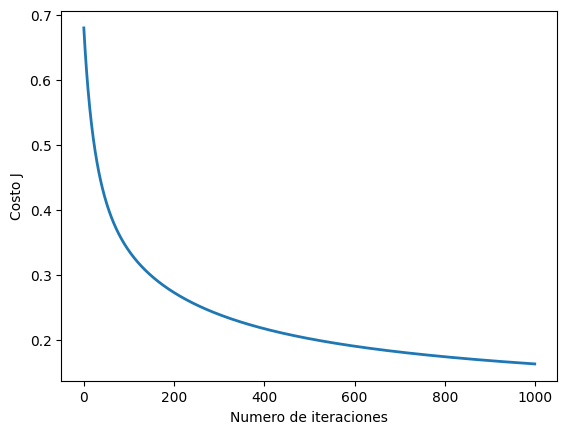

In [74]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.05
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(15)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si se presenta un incendio o no
X_array = [1, 1654733331,20.0,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('El resultado entre falso o verdadero para un incendio es (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [75]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h+epsilon)) - (1 - y).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [76]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('theta inicial (zeros): {:.3f}'.format(cost))
print('valor esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
theta inicial (zeros): 0.693
valor esperado (aproximado): 0.693

[-0.21501277  0.17526892  0.07450492 -0.18075954  0.09655871  0.04277261
 -0.04778139  0.15463413 -0.11283394  0.04886144  0.03676132  0.05755764
  0.03579373  0.02431628 -0.30432667]
Gradiente en theta inicial (zeros):
	[-0.2150, 0.1753, 0.0745, -0.1808, 0.0966, 0.0428, -0.0478, 0.1546, -0.1128, 0.0489, 0.0368, 0.0576, 0.0358, 0.0243, -0.3043]


In [77]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-0.21462558,  0.17585177,  0.07401689, -0.18056766,  0.09697655,  0.04380724,
 -0.04832358,  0.15383585, -0.11280644,  0.04992442,  0.03834761,  0.05785728,
  0.03740429,  0.02606025, -0.3042659])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))

[-0.21462558  0.17585177  0.07401689 -0.18056766  0.09697655  0.04380724
 -0.04832358  0.15383585 -0.11280644  0.04992442  0.03834761  0.05785728
  0.03740429  0.02606025 -0.3042659 ]
Costo en theta prueba: 1.028
Gradiente en theta prueba:
	[-0.272, 0.271, 0.110, -0.292, 0.156, 0.099, -0.088, 0.198, -0.216, 0.102, 0.084, 0.113, 0.082, 0.063, -0.423]


In [78]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))

<ipython-input-78-4bfe3387cb04>:7: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


Costo con un valor de theta encontrado por optimize.minimize: 0.031
theta:
	[25.511, -0.720, -1.287, 1.738, -70.330, 13.818, -0.041, -8.564, -4.445, 0.430, 1.235, 0.606, 1.301, 2.000, 34.425]


In [80]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [82]:
#  Predice la probabilidad de un incendio
prob = sigmoid(np.dot([1, 1654733331,20.0,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0], theta))
print('Para la deteccion de humo con los datos introducidos la probabilidad es de: {:.3f}'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para la deteccion de humo con los datos introducidos la probabilidad es de: 0.000
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 99.40 %
Precisión esperada (aproximadamente): 89.00 %


<ipython-input-66-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
